In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Read the CSV and Perform Basic Data Cleaning

In [5]:
# Load the data

housing_df = pd.read_csv('Data\clean_merged_data.csv')

In [6]:
housing_df.head()

,City,Longitude,latitude,Population,median_age,median_income,median_house_value,total_rooms,Bedrooms,Households,ocean_proximity,max_temp,Humidity,Cloudiness,wind_speed,Description,County,Employees,Establishments
0,Mission Viejo,-117.66,33.61,789,16,8.4112,286900,2022,254,270,<1H OCEAN,94.75,63,59,5.01,broken clouds,Orange,1191075,71255
1,Mission Viejo,-117.66,33.62,1962,16,6.2177,256600,4065,661,636,<1H OCEAN,94.75,63,59,5.01,broken clouds,Orange,1191075,71255
2,Mission Viejo,-117.67,33.61,1972,24,5.7871,227400,3859,661,624,<1H OCEAN,94.75,63,59,5.01,broken clouds,Orange,1191075,71255
3,Mission Viejo,-117.66,33.61,1713,17,6.0471,248400,3464,519,530,<1H OCEAN,94.75,63,59,5.01,broken clouds,Orange,1191075,71255
4,Mission Viejo,-117.66,33.61,860,21,7.1497,274000,1932,266,286,<1H OCEAN,94.75,63,59,5.01,broken clouds,Orange,1191075,71255


In [7]:
#drop unnecessary/low value columns 'Longitude','latitude','City','County'

housing_df.drop(['City', 'County','Longitude','latitude'],axis=1, inplace=True)


In [8]:
#convert categorical values

housing_df=pd.get_dummies(housing_df)
housing_df.head()

,Population,median_age,median_income,median_house_value,total_rooms,Bedrooms,Households,max_temp,Humidity,Cloudiness,...,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,Description_broken clouds,Description_clear sky,Description_few clouds,Description_haze,Description_overcast clouds,Description_scattered clouds,Description_smoke,Description_thunderstorm
0,789,16,8.4112,286900,2022,254,270,94.75,63,59,...,0,0,1,0,0,0,0,0,0,0
1,1962,16,6.2177,256600,4065,661,636,94.75,63,59,...,0,0,1,0,0,0,0,0,0,0
2,1972,24,5.7871,227400,3859,661,624,94.75,63,59,...,0,0,1,0,0,0,0,0,0,0
3,1713,17,6.0471,248400,3464,519,530,94.75,63,59,...,0,0,1,0,0,0,0,0,0,0
4,860,21,7.1497,274000,1932,266,286,94.75,63,59,...,0,0,1,0,0,0,0,0,0,0


In [9]:
# Split our preprocessed data into our features and target arrays
X = housing_df.drop(columns = ["median_house_value"])
y = housing_df['median_house_value']


In [10]:
# Split the preprocessed data into a training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=1/3)

In [11]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Gradient Boosting Regressor

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

In [13]:
# define the model
model_n_estimator_scores = []
for n_estimator in range(10,1000,10):
    params = {
        "n_estimators": n_estimator,
        "random_state":1
    }
    model = GradientBoostingRegressor(**params)
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    model_n_estimator_scores.append(model.score(X_test_scaled, y_test))
    print(f'n_estimator val:{n_estimator}', model.score(X_test_scaled, y_test))


 


n_estimator val:10 0.5208932045959471
n_estimator val:20 0.6145314509053361
n_estimator val:30 0.6676813612361918
n_estimator val:40 0.694391060874096
n_estimator val:50 0.7122239127814519
n_estimator val:60 0.7254921343319833
n_estimator val:70 0.7351036238073215
n_estimator val:80 0.7417210820621993
n_estimator val:90 0.7457659521277669
n_estimator val:100 0.7499700829124283
n_estimator val:110 0.753075085183379
n_estimator val:120 0.753801435911196
n_estimator val:130 0.7565772905919053
n_estimator val:140 0.7585151109104662
n_estimator val:150 0.759721133491453
n_estimator val:160 0.760217243420656
n_estimator val:170 0.7615063688724515
n_estimator val:180 0.7636778425815182
n_estimator val:190 0.7645251023747932
n_estimator val:200 0.7656042268629276
n_estimator val:210 0.7659690752445389
n_estimator val:220 0.7675609446078847
n_estimator val:230 0.7683212867717223
n_estimator val:240 0.7699949164294432
n_estimator val:250 0.7707264723127919
n_estimator val:260 0.7711735395714028


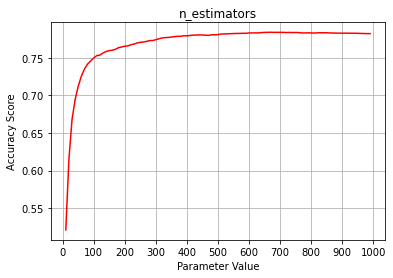

<Figure size 432x288 with 0 Axes>

In [14]:
#feature_importance = model.feature_importances_
#feature_importance

import matplotlib.pyplot as plt
import numpy as np
parameter_values = [x for x in range(10,1000,10)]

x = parameter_values
y = model_n_estimator_scores


plt.plot(x, y,color = "red")
plt.xticks(np.arange(0, 1001, step=100))
plt.xlabel('Parameter Value')
plt.ylabel('Accuracy Score')
plt.title("n_estimators")
plt.grid()
plt.show()
plt.savefig("n_estimators")

In [21]:
# define the model
max_depth_scores = []
for max_depth in range(2,50,2):
    params = {
        "n_estimators": 600,
        "max_depth":max_depth,
        "random_state":1
    }
    model = GradientBoostingRegressor(**params)
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    max_depth_scores.append(model.score(X_test_scaled, y_test))
    print(f'max_depth val:{max_depth}', model.score(X_test_scaled, y_test))

max_depth val:2 0.7705856302353259
max_depth val:4 0.7919801769403144
max_depth val:6 0.7814318025197297
max_depth val:8 0.7738728810681686
max_depth val:10 0.7555317900755554
max_depth val:12 0.7368350184694319
max_depth val:14 0.7029111015545835
max_depth val:16 0.664723223091677
max_depth val:18 0.6257066163080964
max_depth val:20 0.6065405016455567
max_depth val:22 0.5849960471032302
max_depth val:24 0.5678977509650593
max_depth val:26 0.5604540638769671
max_depth val:28 0.5613452948009683
max_depth val:30 0.5586009130933309
max_depth val:32 0.5602888063975793
max_depth val:34 0.5602888063975793
max_depth val:36 0.5602888063975793
max_depth val:38 0.5602888063975793
max_depth val:40 0.5602888063975793
max_depth val:42 0.5602888063975793
max_depth val:44 0.5602888063975793
max_depth val:46 0.5602888063975793
max_depth val:48 0.5602888063975793


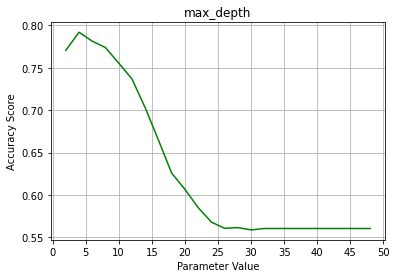

<Figure size 432x288 with 0 Axes>

In [22]:

max_depth_values = [x for x in range(2,50,2)]

x = max_depth_values
y = max_depth_scores


plt.plot(x, y,color = "green")
plt.xticks(np.arange(0, 51, step=5))
plt.xlabel('Parameter Value')
plt.ylabel('Accuracy Score')
plt.title("max_depth")
plt.grid()
plt.show()
plt.savefig("max_depth")


In [23]:
# define the model
max_feature_scores = []
max_features = ['auto', 'sqrt', 'log2']
for max_feature in max_features:
    params = {
        "n_estimators": 600,
        "max_depth":4,
        "max_features":max_feature,
        "random_state":1
    }
    model = GradientBoostingRegressor(**params)
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    max_feature_scores.append(model.score(X_test_scaled, y_test))
    print(f'max_features val:{max_feature}', model.score(X_test_scaled, y_test))

max_features val:auto 0.7919801769403144
max_features val:sqrt 0.7933886509305309
max_features val:log2 0.7887317643571896


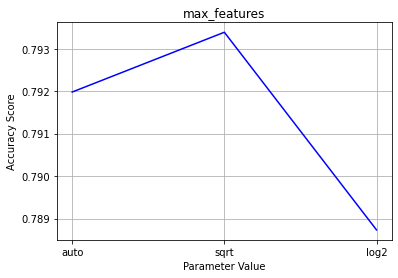

<Figure size 432x288 with 0 Axes>

In [24]:
x = ['auto', 'sqrt', 'log2']
y = max_feature_scores


plt.plot(x, y,color = "blue")
plt.xticks(np.arange(0, 3, step=1))
plt.xlabel('Parameter Value')
plt.ylabel('Accuracy Score')
plt.title("max_features")
plt.grid()
plt.show()
plt.savefig("max_features")

In [25]:
params = {
        "n_estimators": 600,
    "max_depth": 4,
    "max_features":'sqrt',
    "random_state":1
     }
model = GradientBoostingRegressor(**params)
model.fit(X_train_scaled,y_train)

y_pred = model.predict(X_test_scaled)
print(f'model score is :{model.score(X_test_scaled, y_test)}')

model score is :0.7933886509305309


In [26]:
feature_importance = model.feature_importances_
feature_importance

array([5.00288018e-02, 2.39584085e-02, 4.02539634e-01, 5.48298385e-02,
       2.61891434e-02, 2.58730753e-02, 8.64876612e-02, 8.80202126e-02,
       8.83112270e-03, 2.68213667e-02, 3.44162780e-02, 6.53013843e-02,
       1.50825170e-02, 6.99414635e-02, 2.06456742e-04, 5.74843921e-03,
       2.66605249e-03, 1.32874347e-03, 1.41093123e-03, 4.65190712e-03,
       2.48044000e-05, 2.03803652e-04, 5.18291798e-03, 4.86612075e-05,
       2.06375214e-04])

In [31]:
sorted_idx = np.argsort(feature_importance)
sorted_idx

array([20, 23, 21, 24, 14, 17, 18, 16, 19, 22, 15,  8, 12,  1,  5,  4,  9,
       10,  0,  3, 11, 13,  6,  7,  2], dtype=int64)

In [30]:
sorted_feature_importance = np.sort(feature_importance)
sorted_feature_importance

array([2.48044000e-05, 4.86612075e-05, 2.03803652e-04, 2.06375214e-04,
       2.06456742e-04, 1.32874347e-03, 1.41093123e-03, 2.66605249e-03,
       4.65190712e-03, 5.18291798e-03, 5.74843921e-03, 8.83112270e-03,
       1.50825170e-02, 2.39584085e-02, 2.58730753e-02, 2.61891434e-02,
       2.68213667e-02, 3.44162780e-02, 5.00288018e-02, 5.48298385e-02,
       6.53013843e-02, 6.99414635e-02, 8.64876612e-02, 8.80202126e-02,
       4.02539634e-01])

In [34]:
pos = np.arange(sorted_idx.shape[0]) + 0.5
pos

array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
       11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
       22.5, 23.5, 24.5])

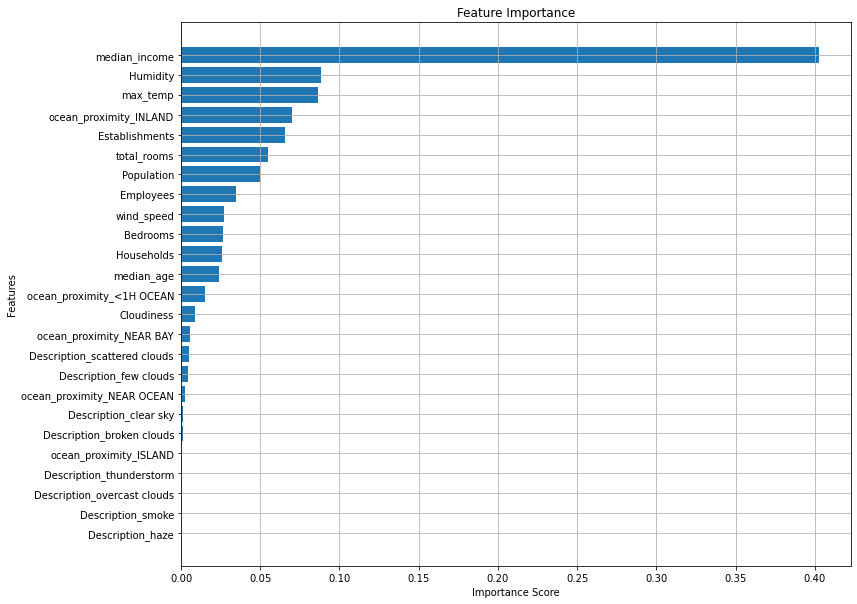

In [42]:
fig = plt.figure(figsize=(12, 10))
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title("Feature Importance")
plt.grid()
plt.savefig("Feature_importance")